# DRILL: Mo' blobs, mo' problems?

You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ($k$-means, mean shift, spectral clustering and affinity propagation) on each one.  Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups. 

### $k$-means:
is a mathematically straightforward but computationally intensive hard-clustering method for grouping data into clusters of similar data points with similar variances. It uses a cost function called the inertia, and the algorithm tries to choose means (called centroids) that minimize the inertia. If you recall the lesson on linear regression, the formula for inertia may be familiar.


$k$-means is an iterative algorithm that eventually converges on a solution.  It begins by choosing $k$ centroids at random, then repeats the following two steps until convergence:

1. Assign each data point to the nearest centroid
2. Create new centroids by taking the mean of all the data points assigned to each centroid

The algorithm stops when the difference between the old and new centroids is lower than a given threshold.

### mean shift:
works by first calculating the probability that a data point will be present at any point in the n-dimensional space defined by the number of features. Mean-shift is an iterative algorithm. At each iteration, each data point is shifted a tiny bit "up" the nearest hill. If a data point is already at the peak, it stays where it is. Once all data points have reached the point where they are at peaks and all further shifts (if any) are smaller than a given threshold, the algorithm terminates. The data points are then assigned a "cluster" based on their peak.

### spectral clustering:

is based on quantifying similarity between data points – pixels in an image that are nearby or part of the same texture, people in a social network that share a category (friends, family), or words that often appear in the same context would all be types of "similarity" potentially detectable by these algorithms. Spectral clustering defines a similarity matrix of n x n dimensions, where n is the number of data points in the dataset. Spectral clustering is slow and works best when $k$ is not too large and clusters are equal in size.  Unlike $k$-means, the dimension reduction aspect of spectral clustering means that it can identify clusters with non-flat geometry, and clusters are not necessarily globular in the original dimensional space.


### affinity propagation:

is based on defining exemplars for data points. An exemplar is a data point similar enough to another data point that one could conceivably be represented by the other – they convey largely the same information. Affinity Propagation chooses the number of clusters based on the data, and is often used for parsing images. It tends to select more clusters than other methods, making it better suited to data where many clusters are suspected.

Affinity propagation is not a quick algorithm. The time it takes to run each iteration increases with the square of the input data. It's also memory intensive, with memory needs proportional to the square of the input. For this reason, it works best for small and medium datasets, unless you have a lot of time and computational power.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import timeit
#
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.cluster import MeanShift, estimate_bandwidth


from sklearn.cluster import KMeans


from sklearn.cluster import SpectralClustering

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.metrics import silhouette_score

from itertools import cycle

## 1. Two blobs with the same distance

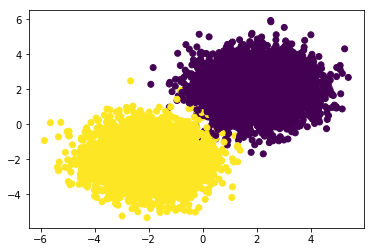

In [2]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

### 1.1 Mean-shift w/ 2 Blobs

In [3]:


# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 2


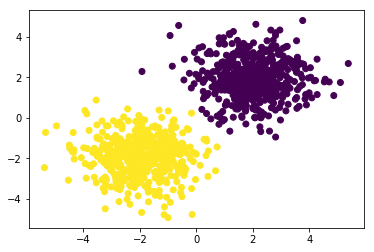

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      512    0
1        2  486


In [4]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

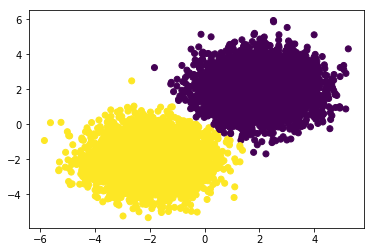

Comparing the assigned categories to the ones in the data:
col_0     0     1
row_0            
0      4476    13
1        12  4499


In [5]:
y_pred = ms.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_pred,y_test))

In [6]:
# Score
score = silhouette_score(X_test, y_pred)

print('Mean-Shift Score: ', score)

Mean-Shift Score:  0.6858714853021222


### 1.2 K-Means W/ 2 Blobs

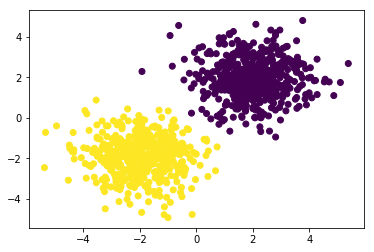

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0      512    3
1        0  485


In [7]:
# Calculate predicted values.
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

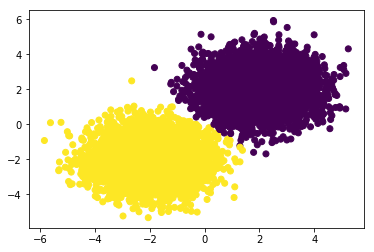

Comparing k-means clusters against the data:
col_0     0     1
row_0            
0      4476    14
1        12  4498
Centers:
[[ 2.02913769  1.9626188 ]
 [-1.95693389 -1.93339709]]


In [8]:
y_pred = kmeans.predict(X_test)

# Plot the solution.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_test))

print('Centers:')
print(kmeans.cluster_centers_)

In [9]:
# Score
score = silhouette_score(X_test, y_pred)

print('K-Means Score: ', score)

K-Means Score:  0.6858766447909477


### 1.3 Spectral clustering w/ 2 Blobs

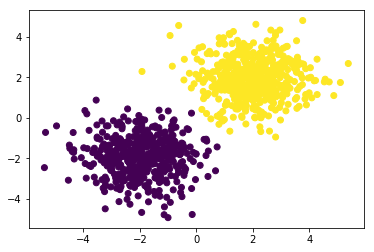

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0        0  512
1      486    2


In [10]:
# We know we're looking for three clusters.
n_clusters=2

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

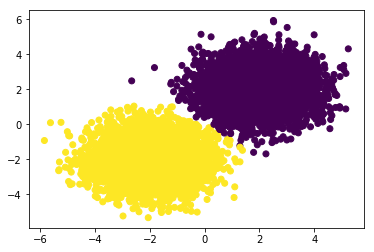

Comparing the assigned categories to the ones in the data:
col_0     0     1
row_0            
0      4477    11
1        15  4497


In [11]:
#Predicted clusters.
y_pred = sc.fit_predict(X_test)

#Graph results.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_test,y_pred))

In [12]:
# Score
score = silhouette_score(X_test, y_pred)

print('Spectral clustering Score: ', score)

Spectral clustering Score:  0.6858664708642657


### 1.4 Affinity propagation w/ 2 Blobs

In [13]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 27


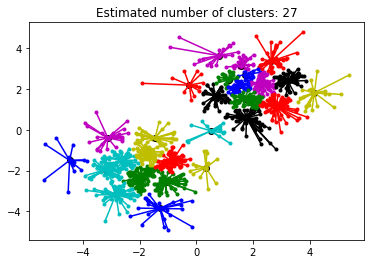

In [14]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

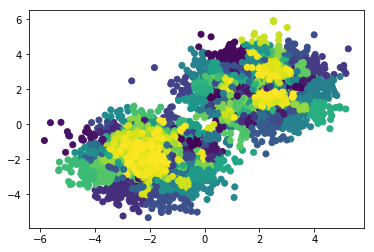

Comparing the assigned categories to the ones in the data:
col_0  0     1     2     3     4     5     6     7     8     9     ...  3602  \
row_0                                                              ...         
0         0     0     1     0     0     0     0     0     1     0  ...     2   
1         1     1     0     1     1     1     1     1     0     1  ...     0   

col_0  3603  3604  3605  3606  3607  3608  3609  3610  3611  
row_0                                                        
0         0     0     0     0     1     0     0     0     0  
1         1     1     1     1     0     1     1     1     1  

[2 rows x 3612 columns]


In [15]:
#Predicted clusters.
y_pred = af.fit_predict(X_test)

#Graph results.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_test,y_pred))

In [16]:

# Score
score = silhouette_score(X_test, y_pred)

print('Affinity propagation Score: ', score)

Affinity propagation Score:  0.08541057626613621


### Blob Set 1 Summary:

<b>Mean-Shift:</b> Performed well. Clusters together but slight scattering. 

<b> $k$-means:</b> Performed well. Similar to mean-shift

<b>Spectral Clustering:</b> Performed well.

<b>Affinity Propagation:</b> Performed poorly by identifying 27 clusters with some with far spacing/outliers. 

## 2. Four blobs with the same distance

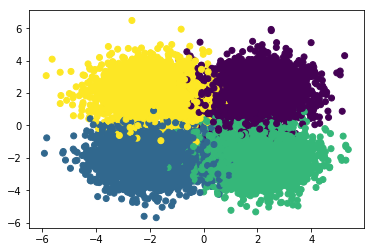

In [17]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2], [-2, 2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

### 2.1 Mean-Shift w. 4 Same Distance

In [18]:
#Mean-Shift

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 4


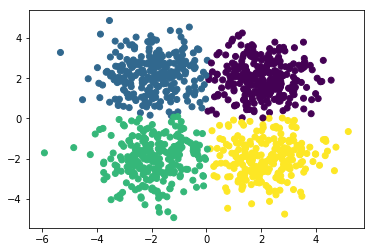

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      260    8    0    5
1        0    5  228    6
2        3    0    9  226
3        2  240    8    0


In [19]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

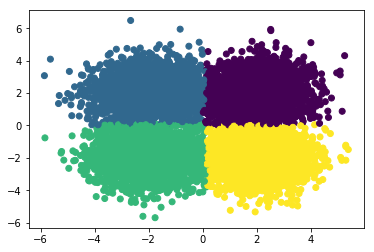

Comparing the assigned categories to the ones in the data:
col_0     0     1     2     3
row_0                        
0      2114     0    48    48
1        56    39     1  2148
2         2  2178    73    53
3        55    44  2140     1


In [20]:
y_pred = ms.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_pred,y_test))

In [21]:
# Score
score = silhouette_score(X_test, y_pred)

print('Mean-Shift Score: ', score)

Mean-Shift Score:  0.5200923073283324


### 2.2 K-Means w 4 Same Distance

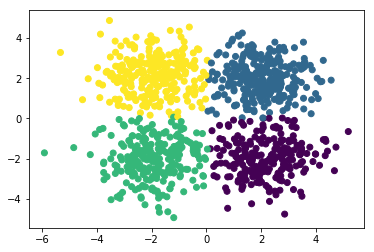

Comparing k-means clusters against the data:
col_0    0    1    2    3
row_0                    
0        5    6  226    0
1      260    0    3    2
2        0  228    9    7
3        8    5    0  241


In [22]:
# Calculate predicted values.
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

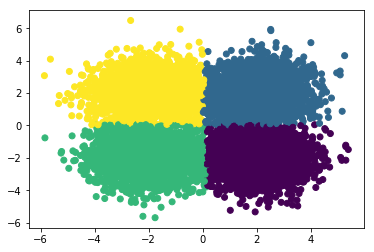

Comparing k-means clusters against the data:
col_0     0     1     2     3
row_0                        
0        55    46  2139     1
1      2116     0    49    50
2         2  2172    72    51
3        54    43     2  2148
Centers:
[[ 2.17036242 -1.96886411]
 [ 2.03629633  2.00616566]
 [-1.9117566  -2.03311251]
 [-1.95131037  2.15794269]]


In [23]:
y_pred = kmeans.predict(X_test)

# Plot the solution.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_test))

print('Centers:')
print(kmeans.cluster_centers_)

In [24]:
# Score
score = silhouette_score(X_test, y_pred)

print('K-Means Score: ', score)

K-Means Score:  0.5202094888704099


### 2.3 Spectral clustering

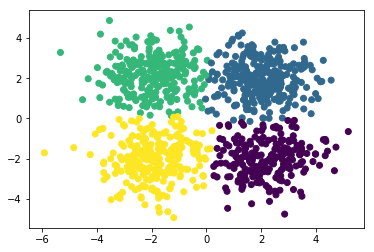

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        2  263    8    0
1        6    0    5  228
2      222    5    0   11
3        0    3  239    8


In [25]:
# We know we're looking for 4 clusters.
n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

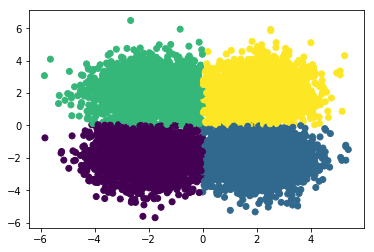

Comparing the assigned categories to the ones in the data:
col_0     0     1     2     3
row_0                        
0         2    51    52  2122
1      2157    59    44     1
2        52  2159     2    49
3        48     2  2148    52


In [26]:
#Predicted clusters.
y_pred = sc.fit_predict(X_test)

#Graph results.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_test,y_pred))

In [27]:
# Score
score = silhouette_score(X_test, y_pred)

print('Spectral clustering Score: ', score)

Spectral clustering Score:  0.5205691023952784


### 2.4 Affinity propagation

In [28]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 25


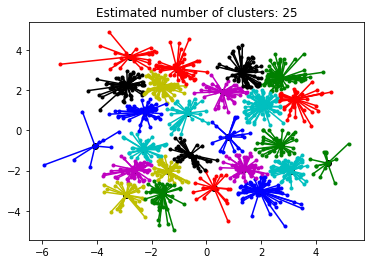

In [29]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

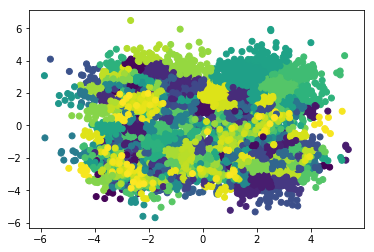

Comparing the assigned categories to the ones in the data:
col_0  0     1     2     3     4     5     6     7     8     9     ...  1676  \
row_0                                                              ...         
0         0     0     0     0     0     0     0     0     1     0  ...     0   
1         1     0     0     0     0     0     0     0     0     0  ...     1   
2         0     0     0     0     0     0     0     1     0     0  ...     0   
3         0     1     1     1     1     5     1     0     0     1  ...     0   

col_0  1677  1678  1679  1680  1681  1682  1683  1684  1685  
row_0                                                        
0         0     0     0     0     0     0     1     0     0  
1         1     0     0     1     0     1     0     0     1  
2         0     1     0     0     0     0     0     0     0  
3         0     0     2     0     5     0     0     1     0  

[4 rows x 1686 columns]


In [30]:
#Predicted clusters.
y_pred = af.fit_predict(X_test)

#Graph results.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_test,y_pred))

In [31]:
# Score
score = silhouette_score(X_test, y_pred)

print('Affinity propagation Score: ', score)

Affinity propagation Score:  0.13598454024211695


### Blob Set 2 Summary:

<b>Mean-Shift:</b> Performed ok. Clusters more scattered than Blob Set 1.

<b> $k$-means:</b> Performed ok. Clusters more scattered than Blob Set 1.

<b>Spectral Clustering:</b> Performed ok. Clusters more scattered than Blob Set 1.

<b>Affinity Propagation:</b>

## 3. Two Blobs Farther Distance

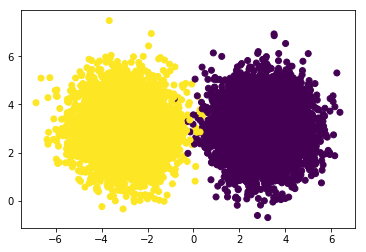

In [32]:
# The coordinates of the centers of our blobs.
centers = [[3, 3], [-3, 3]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

### 3.1 Mean-Shift Two Blobs Farther Distance

In [33]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 2


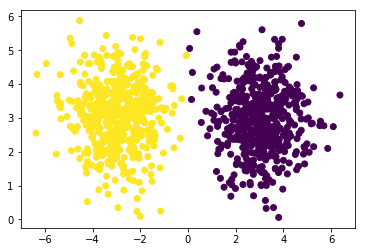

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      511    1
1        1  487


In [34]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

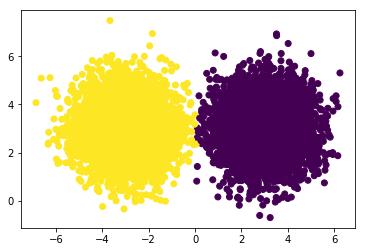

Comparing the assigned categories to the ones in the data:
col_0     0     1
row_0            
0      4480     8
1         8  4504


In [35]:
y_pred = ms.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_pred,y_test))

In [36]:
# Score
score = silhouette_score(X_test, y_pred)

print('Mean-Shift Score: ', score)

Mean-Shift Score:  0.7028619747017868


### 3.2 K-Means Two Blobs Farther Distance

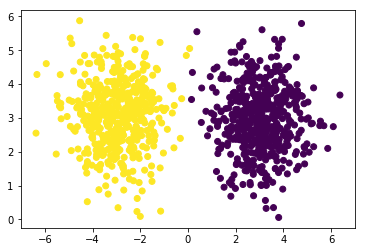

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0      510    1
1        2  487


In [37]:

# Calculate predicted values.
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

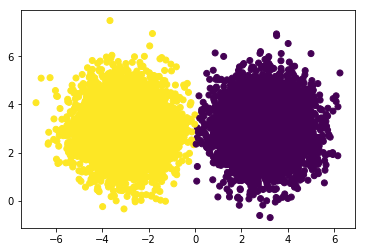

Comparing k-means clusters against the data:
col_0     0     1
row_0            
0      4481     8
1         7  4504
Centers:
[[ 3.04520247  2.97325592]
 [-2.93702554  3.07917653]]


In [38]:
y_pred = kmeans.predict(X_test)

# Plot the solution.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_test))

print('Centers:')
print(kmeans.cluster_centers_)

In [39]:
# Score
score = silhouette_score(X_test, y_pred)

print('K-Means Score: ', score)

K-Means Score:  0.702869440280636


### 3.3 Spectral Clustering Two Blobs Farther Distance

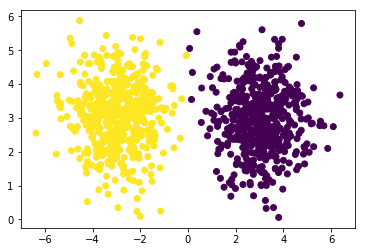

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      511    1
1        1  487


In [40]:
# We know we're looking for 2 clusters.
n_clusters=2

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

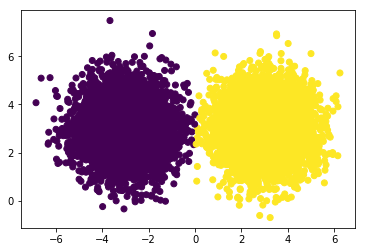

Comparing the assigned categories to the ones in the data:
col_0     0     1
row_0            
0         7  4481
1      4504     8


In [41]:
#Predicted clusters.
y_pred = sc.fit_predict(X_test)

#Graph results.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_test,y_pred))

In [42]:
# Score
score = silhouette_score(X_test, y_pred)

print('Spectral clustering Score: ', score)

Spectral clustering Score:  0.702869440280636


### 3.4 Affinity Propagation Two Blobs Farther Distance

In [43]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 144


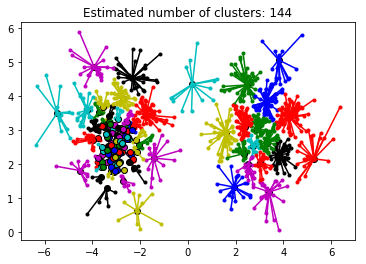

In [44]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

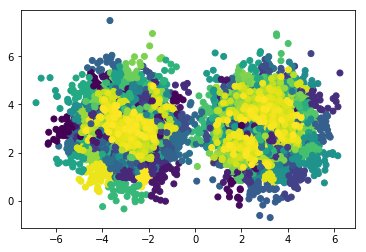

Comparing the assigned categories to the ones in the data:
col_0  0     1     2     3     4     5     6     7     8     9     ...  5134  \
row_0                                                              ...         
0         0     0     1     1     0     1     0     1     0     0  ...     0   
1         1     1     0     0     1     0     1     0     1     1  ...     4   

col_0  5135  5136  5137  5138  5139  5140  5141  5142  5143  
row_0                                                        
0         0     0     1     1     0     0     0     0     0  
1         1     1     0     0     1     1     5     1     1  

[2 rows x 5144 columns]


In [45]:
#Predicted clusters.
y_pred = af.fit_predict(X_test)

#Graph results.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_test,y_pred))

In [46]:

# Score
score = silhouette_score(X_test, y_pred)

print('Affinity propagation Score: ', score)

Affinity propagation Score:  0.06910039279911269


### Blob Set 3 Summary:

<b> $k$-means:</b>

<b>Mean-Shift:</b>

<b>Spectral Clustering:</b>

<b>Affinity Propagation:</b>

## 4. Five Random Blobs Farther Distances

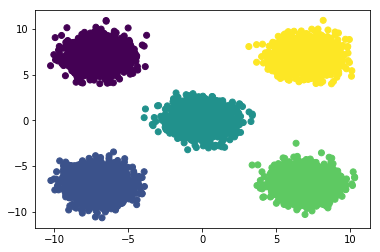

In [47]:
centers = [[-7, 7], [-7, -7],[0,0], [7,-7], [7,7]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

### 4.1 Mean-Shift Five Blobs Farther Distances

In [48]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 5


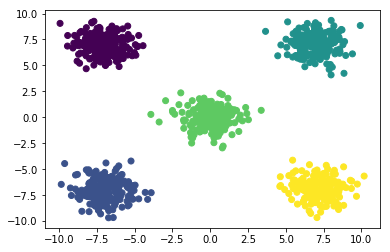

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0      221    0    0    0    0
1        0  203    0    0    0
2        0    0    0  191    0
3        0    0    0    0  187
4        0    0  198    0    0


In [49]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

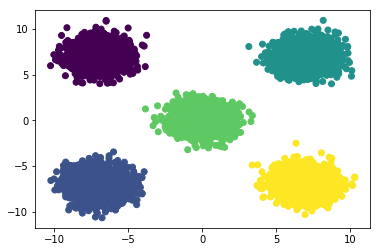

Comparing the assigned categories to the ones in the data:
col_0     0     1     2     3     4
row_0                              
0      1779     0     0     0     0
1         0  1797     0     0     0
2         0     0     0     0  1802
3         0     0  1809     0     0
4         0     0     0  1813     0


In [50]:
y_pred = ms.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_pred,y_test))

In [51]:
# Score
score = silhouette_score(X_test, y_pred)

print('Mean-Shift Score: ', score)

Mean-Shift Score:  0.8158206944437605


### 4.2 K-Means Five Blobs Farther Distances

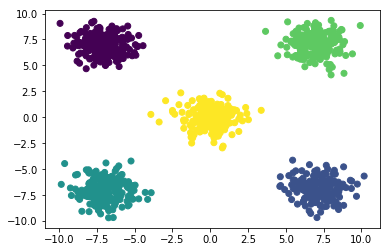

Comparing k-means clusters against the data:
col_0    0    1    2    3    4
row_0                         
0      221    0    0    0    0
1        0    0    0  187    0
2        0  203    0    0    0
3        0    0    0    0  198
4        0    0  191    0    0


In [52]:

# Calculate predicted values.
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

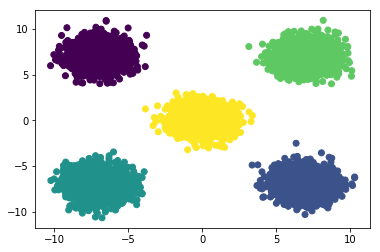

Comparing k-means clusters against the data:
col_0     0     1     2     3     4
row_0                              
0      1779     0     0     0     0
1         0     0     0  1813     0
2         0  1797     0     0     0
3         0     0     0     0  1802
4         0     0  1809     0     0
Centers:
[[-7.00987821  6.99544121]
 [ 7.16783618 -6.84570325]
 [-6.91336813 -7.01910146]
 [ 7.01510486  7.08212594]
 [-0.00987612 -0.07946723]]


In [53]:
y_pred = kmeans.predict(X_test)

# Plot the solution.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_test))

print('Centers:')
print(kmeans.cluster_centers_)

In [54]:
# Score
score = silhouette_score(X_test, y_pred)

print('K-Means Score: ', score)

K-Means Score:  0.8158206944437605


### 4.3 Spectral Clustering Five Blobs Farther Distances

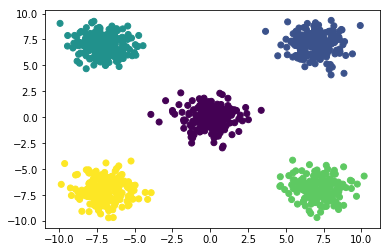

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        0    0  221    0    0
1        0    0    0    0  203
2      191    0    0    0    0
3        0    0    0  187    0
4        0  198    0    0    0


In [55]:
# We know we're looking for 3 clusters.
n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

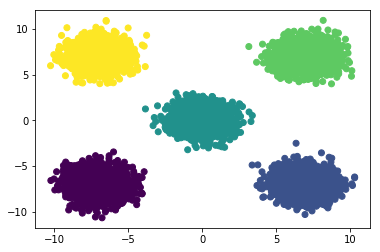

Comparing the assigned categories to the ones in the data:
col_0     0     1     2     3     4
row_0                              
0         0     0     0     0  1779
1      1797     0     0     0     0
2         0     0  1809     0     0
3         0  1813     0     0     0
4         0     0     0  1802     0


In [56]:
#Predicted clusters.
y_pred = sc.fit_predict(X_test)

#Graph results.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_test,y_pred))

In [57]:
# Score
score = silhouette_score(X_test, y_pred)

print('Spectral clustering Score: ', score)

Spectral clustering Score:  0.8158206944437605


### 4.4 Affinity Propagation Five Blobs Farther Distances

In [58]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 392


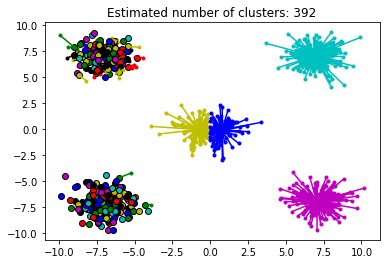

In [59]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

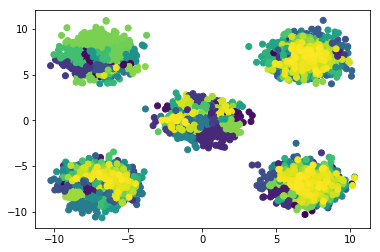

Comparing the assigned categories to the ones in the data:
col_0  0     1     2     3     4     5     6     7     8     9     ...  4332  \
row_0                                                              ...         
0         0     0     0     0     0     0     0     0     0     0  ...     0   
1         0     0     0     0     0     2     0     0     0     0  ...     0   
2         0     0     0     0     0     0     0     0     0     0  ...     0   
3         1     1     0     0     0     0     1     0     2     1  ...     1   
4         0     0     1     1     1     0     0     1     0     0  ...     0   

col_0  4333  4334  4335  4336  4337  4338  4339  4340  4341  
row_0                                                        
0         0     0     0     0     0     0     0     0     0  
1         0     0     0     0     0     0     0     0     0  
2         0     0     0     0     0    12     0     0     0  
3         0     1     0     1     0     0     1     1     1  
4       

In [60]:
#Predicted clusters.
y_pred = af.fit_predict(X_test)

#Graph results.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_test,y_pred))

In [61]:

# Score
score = silhouette_score(X_test, y_pred)

print('Affinity propagation Score: ', score)

Affinity propagation Score:  0.07563829848458004


### Blob Set 4 Summary:

<b> $k$-means:</b>

<b>Mean-Shift:</b>

<b>Spectral Clustering:</b>

<b>Affinity Propagation:</b>